In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
matches=pd.read_csv('matches.csv',index_col=0)

In [4]:
matches.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,8.0,1.0,18.2,0.0,0,0,2020,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,Match Report,NaN,7.0,0.0,13.4,1.0,0,0,2020,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,10.0,3.0,18.5,0.0,0,0,2020,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,Match Report,NaN,11.0,1.0,18.3,1.0,0,0,2020,Sheffield United
42,2021-05-23,16:00,Premier League,Matchweek 38,Sun,Home,W,1.0,0.0,Burnley,...,Match Report,NaN,12.0,3.0,17.4,0.0,0,0,2020,Sheffield United


In [5]:
matches.shape

(3438, 28)

In [6]:
matches["team"].value_counts()
#có những dội đấu ít trận hơn là do chúng ta thu thập cả những mùa mà đội đó không tham gia

team
Arsenal                     172
Newcastle United            172
Chelsea                     172
Brighton and Hove Albion    172
Aston Villa                 172
Manchester City             172
Wolverhampton Wanderers     172
Crystal Palace              172
West Ham United             172
Manchester United           172
Tottenham Hotspur           172
Liverpool                   171
Everton                     171
Fulham                      134
Brentford                   134
Leicester City              134
Southampton                 134
Leeds United                114
Burnley                     114
Bournemouth                  96
Nottingham Forest            96
Sheffield United             76
Luton Town                   38
Norwich City                 38
Watford                      38
West Bromwich Albion         38
Ipswich Town                 20
Name: count, dtype: int64

In [7]:
matches["round"].value_counts()
#matchweek sau đó bị thiếu là do chúng ta thu thập dữ liệu khi mùa giải còn đang tiếp dẫn, nhìn nó không ảnh hưởng đến kết quả dự đoán

round
Matchweek 1     100
Matchweek 2     100
Matchweek 3     100
Matchweek 4     100
Matchweek 5     100
Matchweek 6     100
Matchweek 7     100
Matchweek 8     100
Matchweek 9     100
Matchweek 10    100
Matchweek 11    100
Matchweek 12    100
Matchweek 13    100
Matchweek 14    100
Matchweek 16    100
Matchweek 17    100
Matchweek 18    100
Matchweek 19    100
Matchweek 20    100
Matchweek 15     98
Matchweek 21     80
Matchweek 22     80
Matchweek 23     80
Matchweek 24     80
Matchweek 25     80
Matchweek 26     80
Matchweek 27     80
Matchweek 28     80
Matchweek 30     80
Matchweek 31     80
Matchweek 32     80
Matchweek 33     80
Matchweek 29     80
Matchweek 35     80
Matchweek 36     80
Matchweek 37     80
Matchweek 34     80
Matchweek 38     80
Name: count, dtype: int64

In [8]:
matches[matches["team"]=="Fulham"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-16,20:00,Premier League,Matchweek 1,Fri,Away,L,0.0,1.0,Manchester Utd,...,Match Report,NaN,10.0,2.0,16.9,0.0,0,0,2024,Fulham
1,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,2.0,1.0,Leicester City,...,Match Report,NaN,18.0,6.0,15.8,1.0,0,0,2024,Fulham
3,2024-08-31,15:00,Premier League,Matchweek 3,Sat,Away,D,1.0,1.0,Ipswich Town,...,Match Report,NaN,9.0,4.0,13.1,0.0,0,0,2024,Fulham
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,D,1.0,1.0,West Ham,...,Match Report,NaN,21.0,5.0,16.4,2.0,0,0,2024,Fulham
6,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,1.0,Newcastle Utd,...,Match Report,NaN,22.0,11.0,15.4,0.0,0,0,2024,Fulham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-01,17:30,Premier League,Matchweek 34,Sat,Away,L,0.0,2.0,Chelsea,...,Match Report,NaN,10.0,3.0,20.6,0.0,0,0,2020,Fulham
39,2021-05-10,20:00,Premier League,Matchweek 35,Mon,Home,L,0.0,2.0,Burnley,...,Match Report,NaN,21.0,3.0,18.2,0.0,0,0,2020,Fulham
40,2021-05-15,15:00,Premier League,Matchweek 36,Sat,Away,L,1.0,3.0,Southampton,...,Match Report,NaN,10.0,3.0,16.8,0.0,0,0,2020,Fulham
41,2021-05-18,18:00,Premier League,Matchweek 37,Tue,Away,D,1.0,1.0,Manchester Utd,...,Match Report,NaN,8.0,5.0,16.8,0.0,0,0,2020,Fulham


In [9]:
matches.dtypes

date              object
time              object
comp              object
round             object
day               object
venue             object
result            object
gf               float64
ga               float64
opponent          object
xg               float64
xga              float64
poss             float64
attendance       float64
captain           object
formation         object
opp formation     object
referee           object
match report      object
notes            float64
sh               float64
sot              float64
dist             float64
fk               float64
pk                 int64
pkatt              int64
season             int64
team              object
dtype: object

In [10]:
matches.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,2740.000000,0.0,3438.000000,3438.000000,3437.000000,3438.000000,3438.000000,3438.000000,3438.000000
mean,1.459570,1.459570,1.409017,1.409017,50.000582,38805.829927,NaN,12.750145,4.289703,17.178964,0.411867,0.114602,0.139616,2021.789412
std,1.304842,1.304842,0.832700,0.832700,12.668946,17237.006280,NaN,5.598443,2.472276,2.978469,0.633833,0.343207,0.376416,1.321201
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,2020.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,26685.000000,NaN,9.000000,2.000000,15.200000,0.000000,0.000000,0.000000,2021.000000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,36422.000000,NaN,12.000000,4.000000,17.100000,0.000000,0.000000,0.000000,2022.000000
75%,2.000000,2.000000,1.900000,1.900000,60.000000,53102.000000,NaN,16.000000,6.000000,18.900000,1.000000,0.000000,0.000000,2023.000000
max,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,16.000000,39.900000,4.000000,3.000000,3.000000,2024.000000


In [11]:
matches["formation"]

0     4-2-3-1
1     4-2-3-1
2     4-2-3-1
3     4-2-3-1
5     4-2-3-1
       ...   
38    3-4-1-2
39      3-5-2
40      3-4-3
41      3-4-3
42      3-4-3
Name: formation, Length: 3438, dtype: object

In [12]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
# # Initialize FeatureHasher
# hasher = FeatureHasher(n_features=4, input_type='string')

# # Apply hashing trick and convert to dense format
# hashed_formation = hasher.transform(matches["formation"].apply(lambda x: [x])).toarray()
# matches[["H0", "H1", "H2", "H3"]] = pd.DataFrame(hashed_formation, index=matches.index)

# hashed_opp_formation = hasher.transform(matches["opp formation"].apply(lambda x: [x])).toarray()
# matches[["OH0", "OH1", "OH2", "OH3"]] = pd.DataFrame(hashed_opp_formation, index=matches.index)

# # Combine hashed features into a single vector column
# matches["formation_feature"] = matches[["H0", "H1", "H2", "H3"]].values.tolist()
# matches["opp_formation_feature"] = matches[["OH0", "OH1", "OH2", "OH3"]].values.tolist()

# # Drop the intermediate columns if not needed
# matches.drop(columns=["H0", "H1", "H2", "H3", "OH0", "OH1", "OH2", "OH3"], inplace=True)
# Encode the formations as integers
formation_encoder = LabelEncoder()
matches['formation_encoded'] = formation_encoder.fit_transform(matches['formation'])
matches['opp_formation_encoded'] = formation_encoder.fit_transform(matches['opp formation'])
# Define the embedding size
embedding_size = 4
# Check the range of input data
min_value = matches['formation_encoded'].min()
max_value = matches['formation_encoded'].max()
print(f"Min value: {min_value}, Max value: {max_value}")
vocab_size = max_value + 1 
# Create the embedding model
embedding_layer = nn.Embedding(vocab_size, embedding_size)
encoded_formations = torch.tensor(matches['formation_encoded'].values)
encoded_opp_formations = torch.tensor(matches['opp_formation_encoded'].values)
embeddings_formation = embedding_layer(encoded_formations)
embeddings_opp_formation = embedding_layer(encoded_opp_formations)
# Add the embeddings to the dataframe
embedding_vectors = embeddings_formation.detach().numpy()
embedding_opp_vectors = embeddings_opp_formation.detach().numpy()
for i in range(embedding_size):
    matches[f'formation_emb_{i}'] = embedding_vectors[:, i]
    matches[f'opp_formation_emb_{i}'] = embedding_opp_vectors[:, i]

# Drop the encoded columns
matches.drop(columns=['formation_encoded', 'opp_formation_encoded'], inplace=True)

Min value: 0, Max value: 21


In [13]:
matches = matches.drop(columns=["notes", "match report"])

In [14]:
matches["captain_code"]=matches["captain"].astype("category").cat.codes

In [15]:
#chuẩn hòa dữ liệu số cho các cột
matches["date"]=pd.to_datetime(matches["date"])
matches["venue_code"]=matches["venue"].astype("category").cat.codes

matches["hour"]=matches["time"].str.replace(":.+", "",regex=True).astype(int)
matches["referee_code"]=matches["referee"].astype("category").cat.codes

In [16]:
# Create a combined list of all unique teams and opponents
all_teams = pd.concat([matches["team"], matches["opponent"]]).unique()

# Create a mapping from team names to unique integer codes
team_code_mapping = {team: code for code, team in enumerate(all_teams)}

# Map the team and opponent columns to their respective codes
matches["team_code"] = matches["team"].map(team_code_mapping)
matches["opp_code"] = matches["opponent"].map(team_code_mapping)

In [17]:
matches["day_code"]=matches["date"].dt.dayofweek
matches["target"]=matches["result"].astype("category").cat.codes

In [18]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation_emb_3,opp_formation_emb_3,captain_code,venue_code,hour,referee_code,team_code,opp_code,day_code,target
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,-0.166222,0.547025,170,0,12,32,0,17,5,2
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,-0.166222,-0.410489,170,1,16,29,0,10,6,2
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,-0.166222,0.547025,170,0,16,2,0,27,6,2
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,-0.166222,0.547025,170,1,15,18,0,28,5,1
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,-0.166222,0.547025,170,1,15,33,0,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,1.428495,0.547025,85,0,19,0,22,32,6,1
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.283205,0.326981,85,1,15,28,22,14,5,1
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,-0.807018,0.547025,85,0,19,11,22,15,6,2
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,-0.807018,-1.578466,85,0,18,24,22,31,2,1


In [19]:
matches.dtypes

date                   datetime64[ns]
time                           object
comp                           object
round                          object
day                            object
venue                          object
result                         object
gf                            float64
ga                            float64
opponent                       object
xg                            float64
xga                           float64
poss                          float64
attendance                    float64
captain                        object
formation                      object
opp formation                  object
referee                        object
sh                            float64
sot                           float64
dist                          float64
fk                            float64
pk                              int64
pkatt                           int64
season                          int64
team                           object
formation_em

In [20]:
matches["attendance"].fillna(matches["attendance"].median(), inplace=True)
matches["dist"].fillna(matches["dist"].median(), inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2660\4264850280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["attendance"].fillna(matches["attendance"].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2660\4264850280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

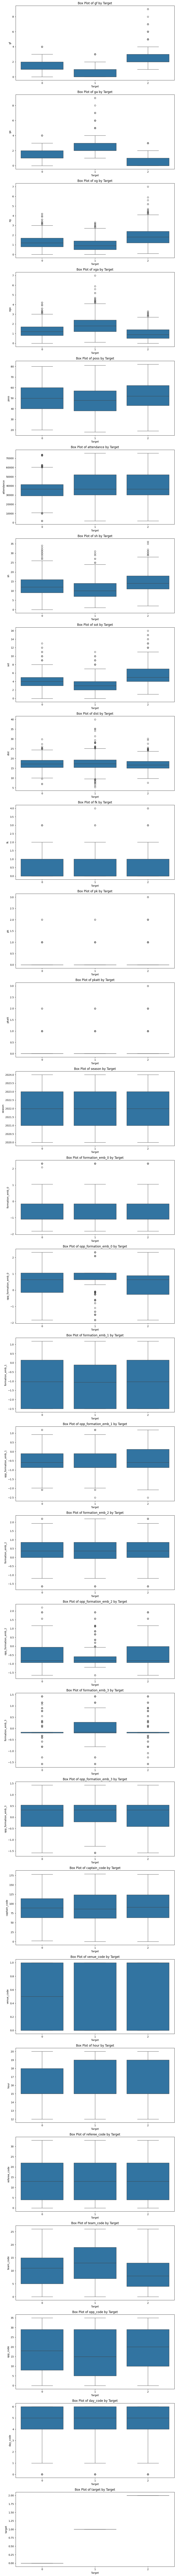

In [21]:
# Lấy danh sách các cột numerical feature
numerical_features = matches.select_dtypes(include='number').columns

# Tạo biểu đồ box plot cho từng cột numerical feature theo từng nhóm của cột target
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 5 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    try:
        
        sns.boxplot(data=matches, x='target', y=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature} by Target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(feature)
    except: # Trường hợp không thể vẽ box plot
        print(f"Cannot plot box plot for {feature}")

#do xuất hiện của kha khá giá trị outliner, song outliner này thuộc nhóm các đặc trưng quan trọng, chúng ta sẽ sử dụng random forest, 1 mô hình ít bị ảnh hưởng bởi chúng

plt.tight_layout()
plt.show()

In [22]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',
       'season', 'team', 'formation_emb_0', 'opp_formation_emb_0',
       'formation_emb_1', 'opp_formation_emb_1', 'formation_emb_2',
       'opp_formation_emb_2', 'formation_emb_3', 'opp_formation_emb_3',
       'captain_code', 'venue_code', 'hour', 'referee_code', 'team_code',
       'opp_code', 'day_code', 'target'],
      dtype='object')

In [23]:
from scipy.stats import pointbiserialr
#Point Biserial Correlation
corr_matches=[]
p_values_matches=[]
for feature in numerical_features:
    corr, p_value = pointbiserialr(matches['target'], matches[feature])
    corr_matches.append(corr)
    p_values_matches.append(p_value)
    print(f"{feature}: Correlation={corr}, P-value={p_value}")
# print(corr_matches)

gf: Correlation=0.49054323671417466, P-value=1.1460112547931979e-207
ga: Correlation=-0.24702482704365974, P-value=5.7784188454682874e-49
xg: Correlation=0.31257215143220407, P-value=8.503569581760776e-79
xga: Correlation=-0.2070245239597953, P-value=1.3539241931596332e-34
poss: Correlation=0.08760257170427027, P-value=2.6815680796450366e-07
attendance: Correlation=0.04626954733575329, P-value=0.0066585283112379256
sh: Correlation=0.15877535856834768, P-value=7.548308752070834e-21
sot: Correlation=0.29290442298372477, P-value=5.499751004769593e-69
dist: Correlation=-0.0644074662433898, P-value=0.00015742921712657778
fk: Correlation=0.005549803064992753, P-value=0.7449586607170589
pk: Correlation=0.12361561762904986, P-value=3.50522253269909e-13
pkatt: Correlation=0.10840548263217745, P-value=1.8564002395254473e-10
season: Correlation=-0.02009439703566477, P-value=0.23883065202365683
formation_emb_0: Correlation=-0.010077363811433315, P-value=0.5547344901061083
opp_formation_emb_0: Corr

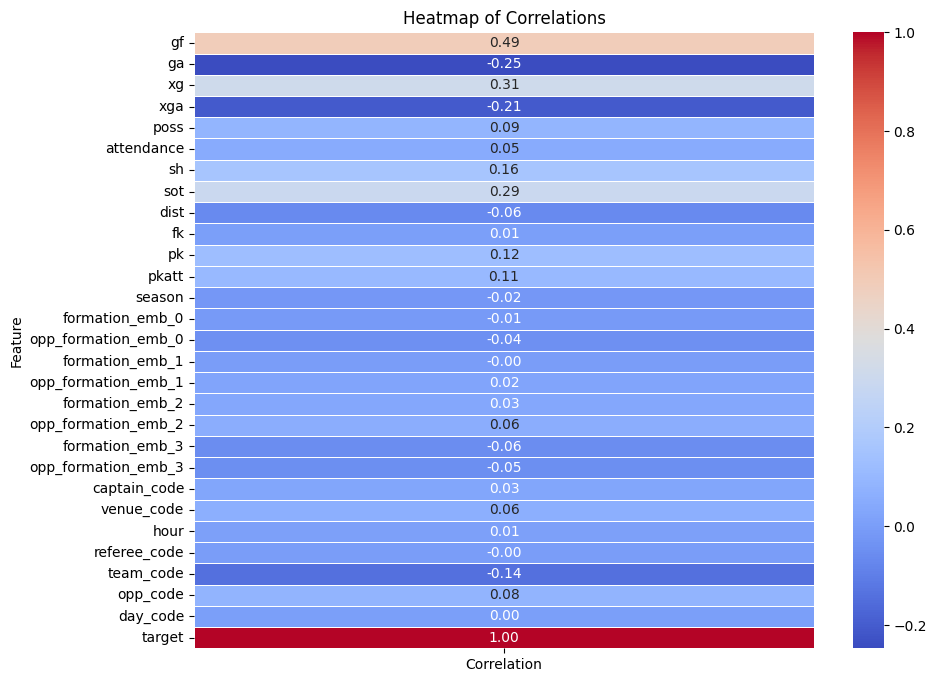

In [24]:
# Dữ liệu tương quan và p-value
data = {
    "Feature": numerical_features,
    "Correlation": corr_matches,
    "P-value": p_values_matches,
}

# Chuyển đổi dữ liệu thành DataFrame và bỏ các giá trị NaN
df = pd.DataFrame(data).dropna(subset=["Correlation"])

# Tạo heatmap từ giá trị tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(df.set_index("Feature")[["Correlation"]], annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()

#kết quả cho thấy gf,ga,xg,sot có mỗi liên hệ mạnh mẽ với hệ số |correlate|>0.4
#các đặc trưng poss,season,hour,dist có mối liên hệ yếu, có thể bỏ đi được
#pk, pkatt không được lớn cũng đủ hiểu vì đây là chỉ sổ cho chấm phạt đền, mà mỗi trận đấu tỉ lệ xuất hiện phạt đền rất thấp



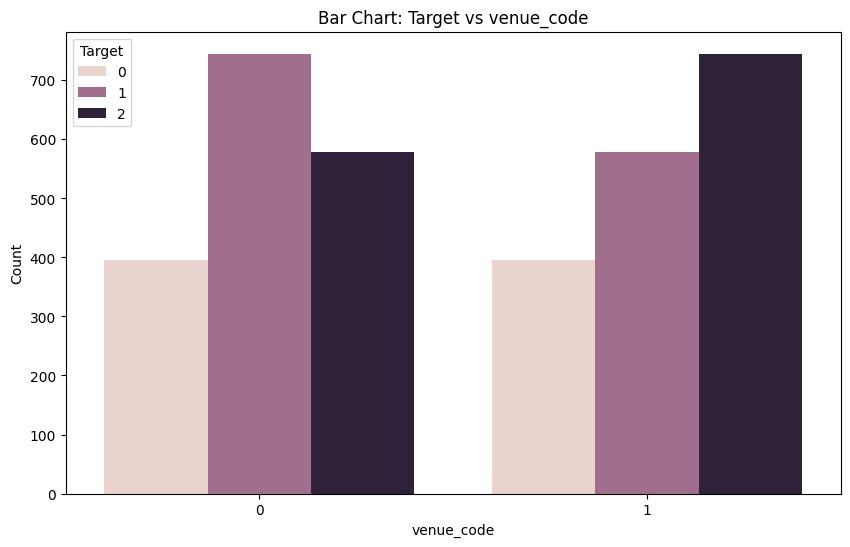

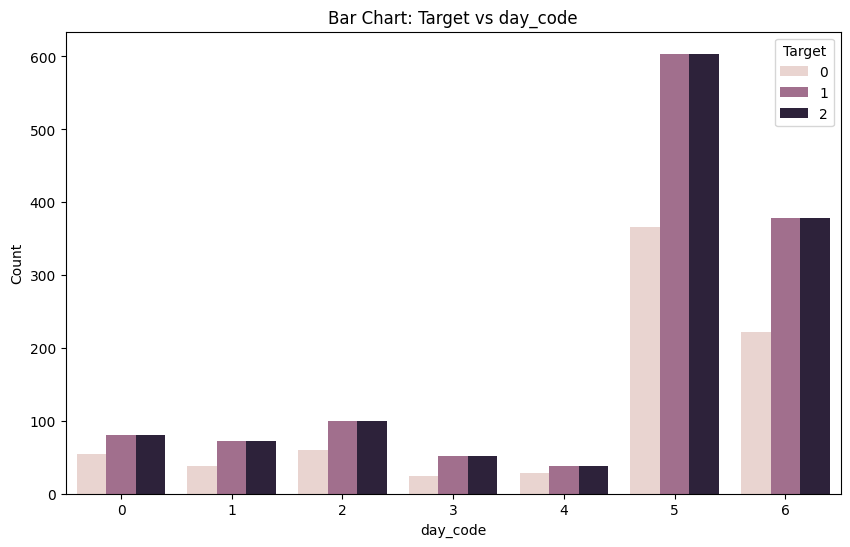

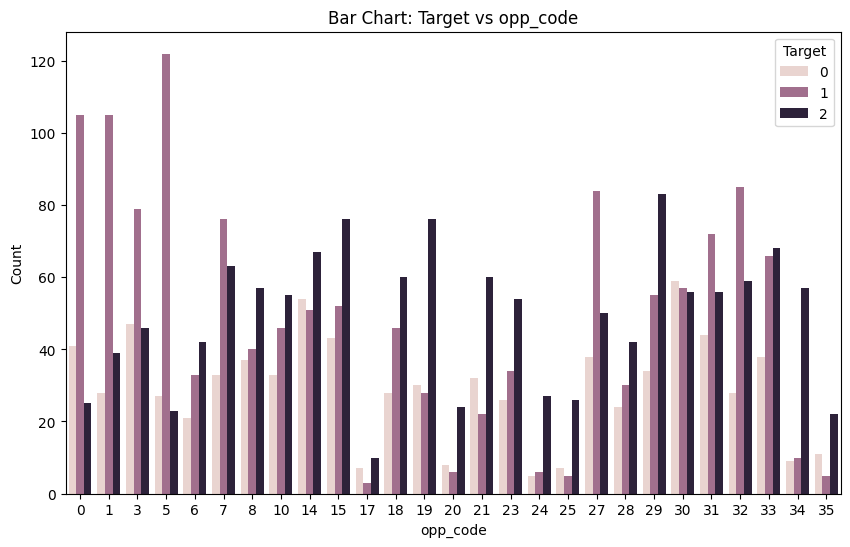

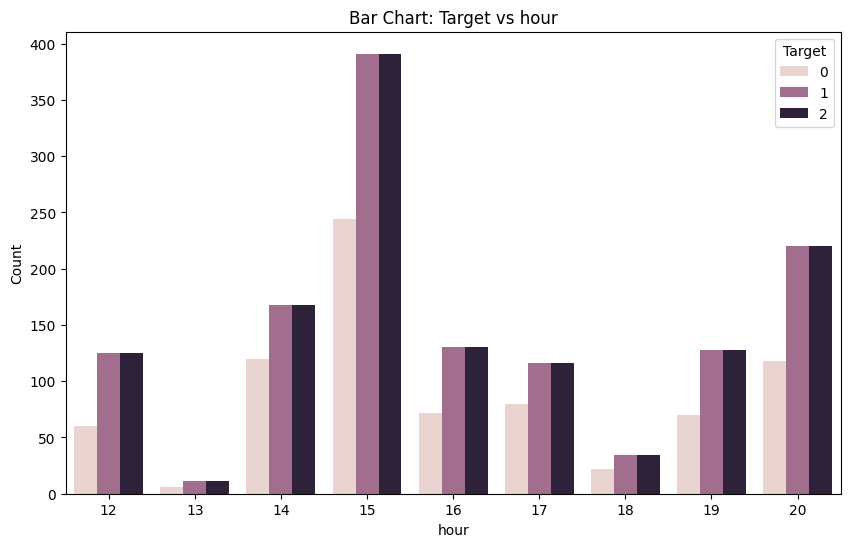

In [25]:
columns_to_plot = ['venue_code', 'day_code', 'opp_code', 'hour']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=matches, x=column, hue='target')
    plt.title(f'Bar Chart: Target vs {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.show()
#'ga', 'sot', 'poss', 'gf', 'xga', 'xg', 'sh', 'dist' lam bieu do khac

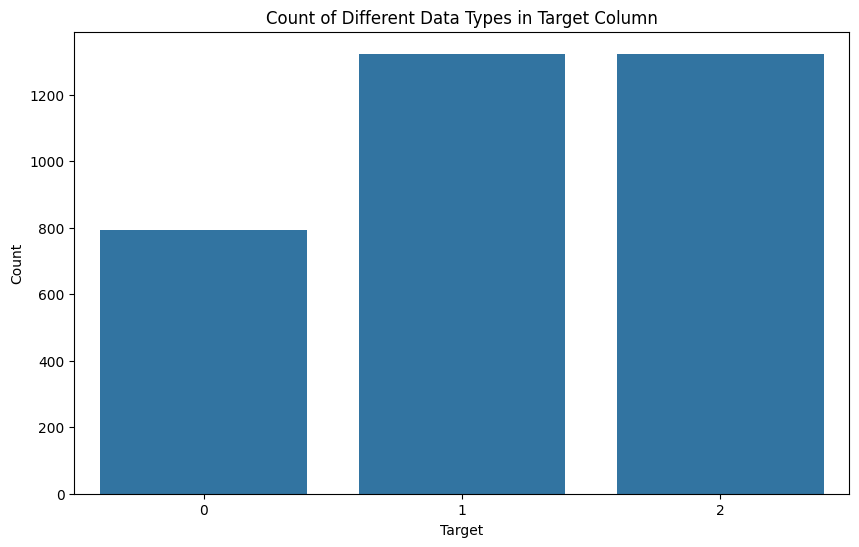

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=matches, x='target')
plt.title('Count of Different Data Types in Target Column')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

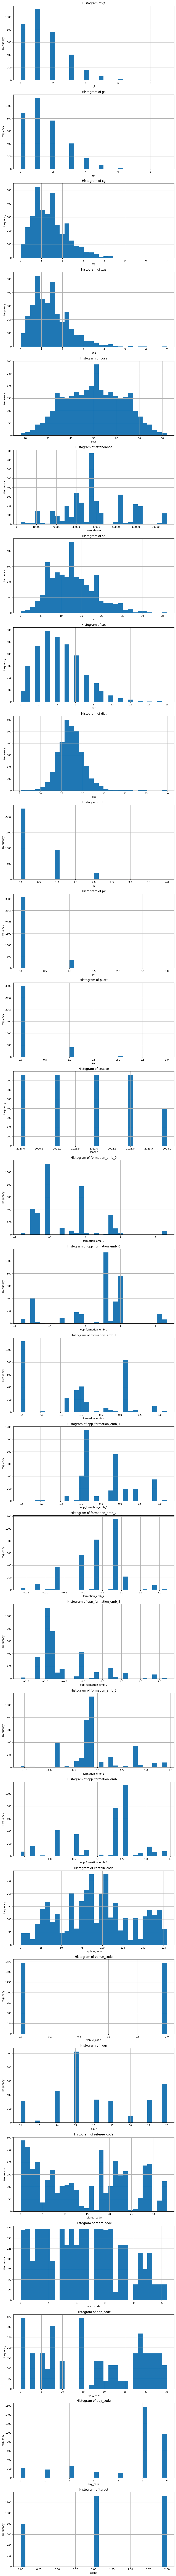

In [27]:
# Lấy danh sách các cột numerical feature
numerical_features = matches.select_dtypes(include='number').columns

# Vẽ biểu đồ histogram cho từng cột numerical feature
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 5 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    matches[feature].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

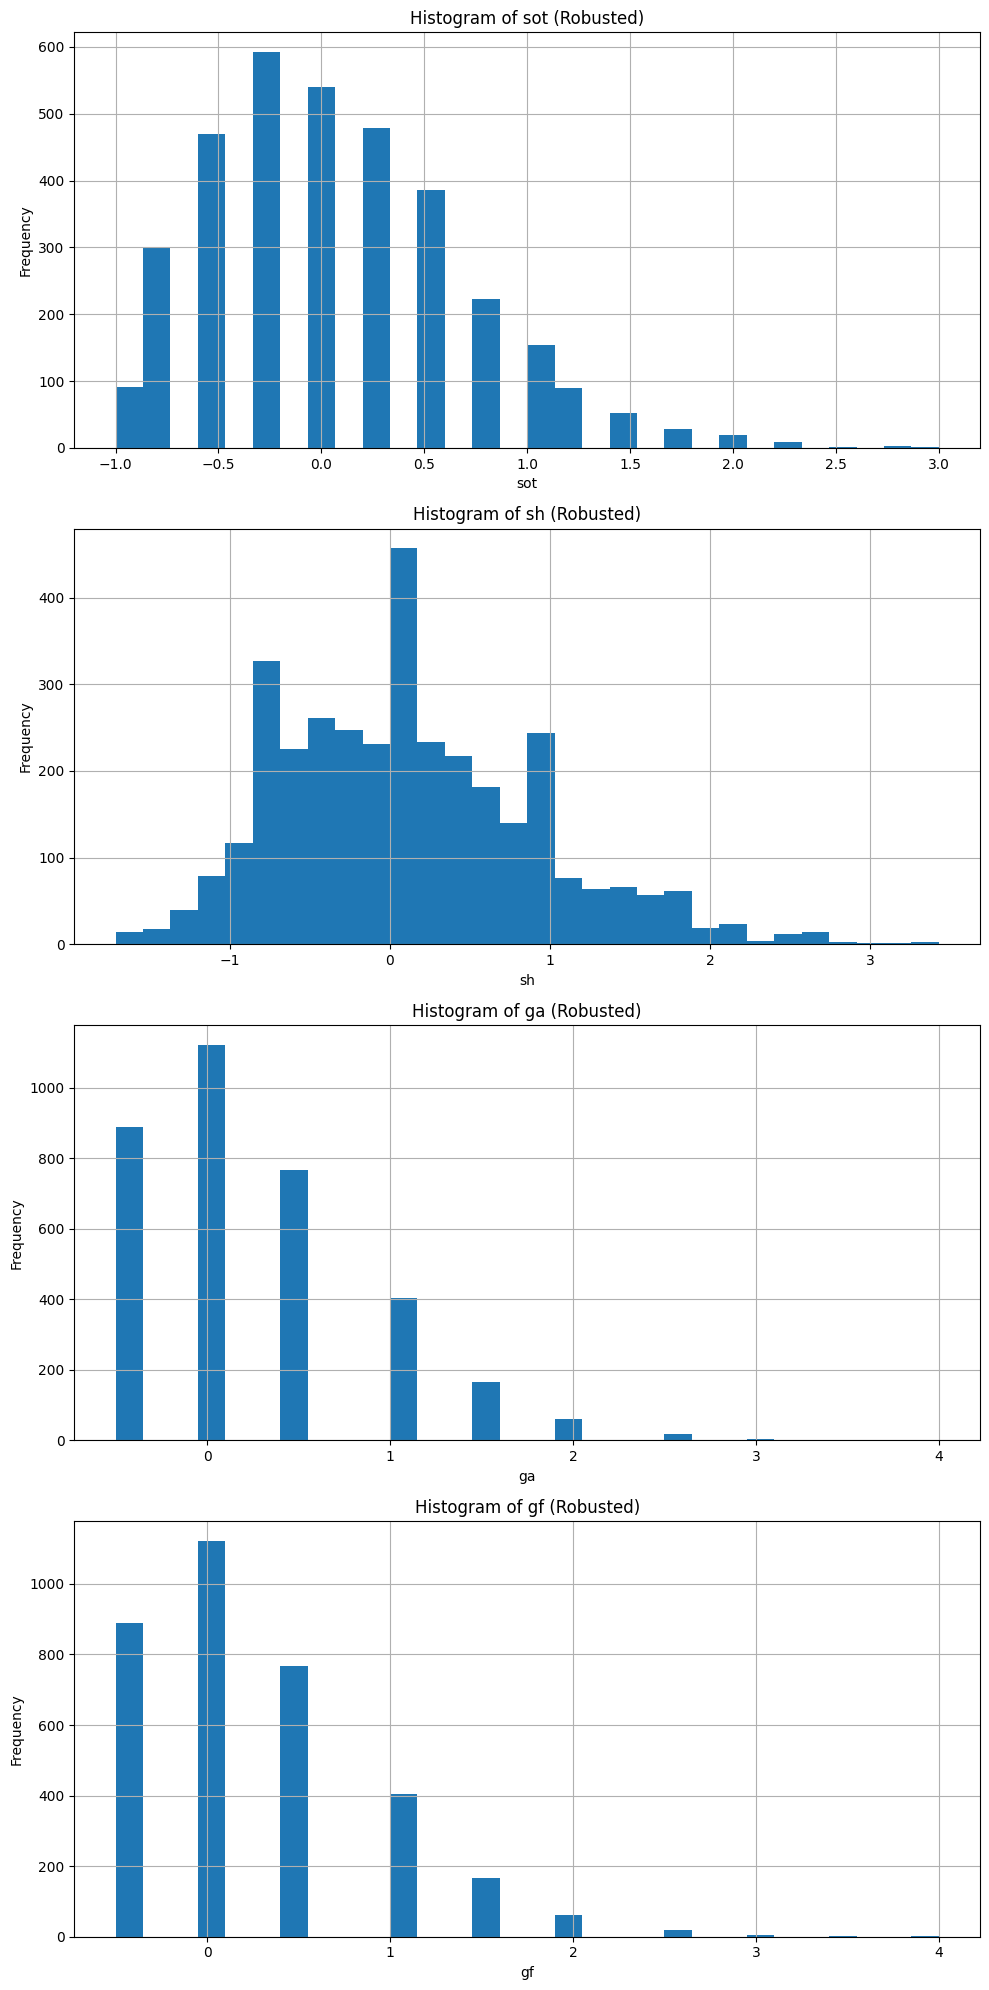

In [28]:
from sklearn.preprocessing import RobustScaler

# List of features to be transformed
features_to_normalize = ['sot', 'sh', 'ga', 'gf']

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the scaler to the specified features
matches[features_to_normalize] = scaler.fit_transform(matches[features_to_normalize])

# Plot histogram for the normalized features
fig, axes = plt.subplots(len(features_to_normalize), 1, figsize=(10, 5 * len(features_to_normalize)))

for i, feature in enumerate(features_to_normalize):
    matches[feature].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {feature} (Robusted)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

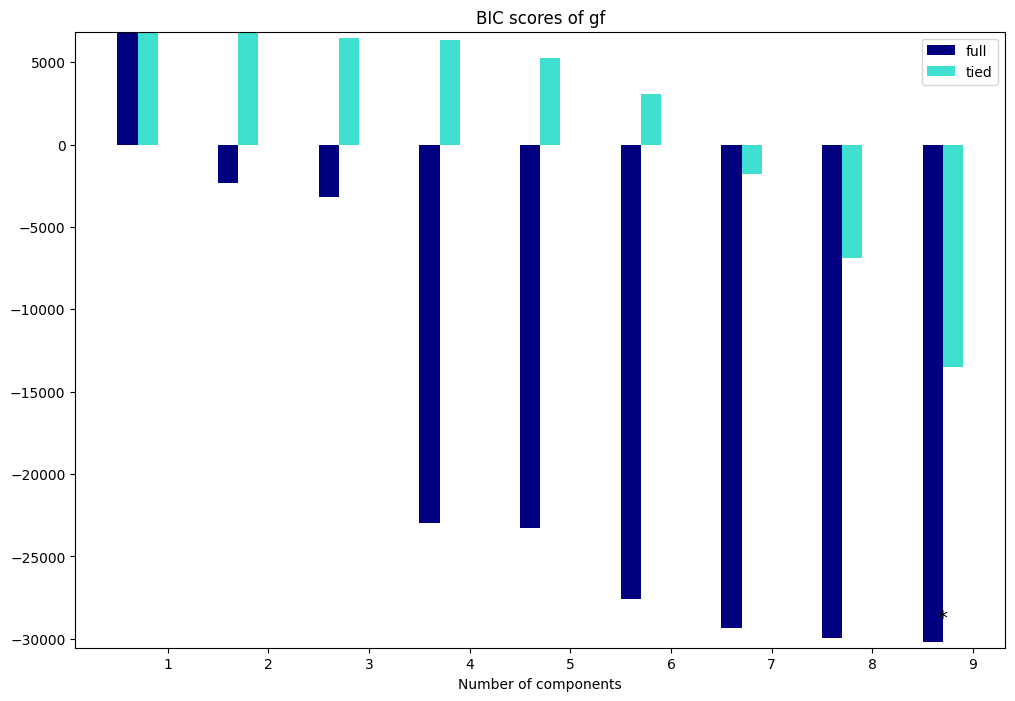

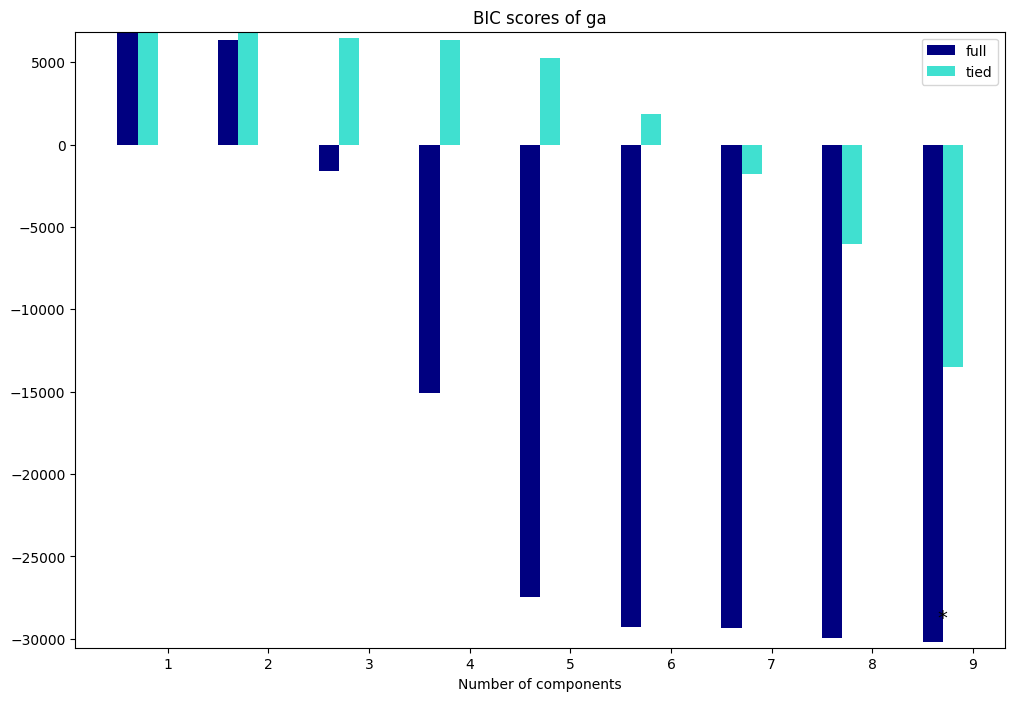

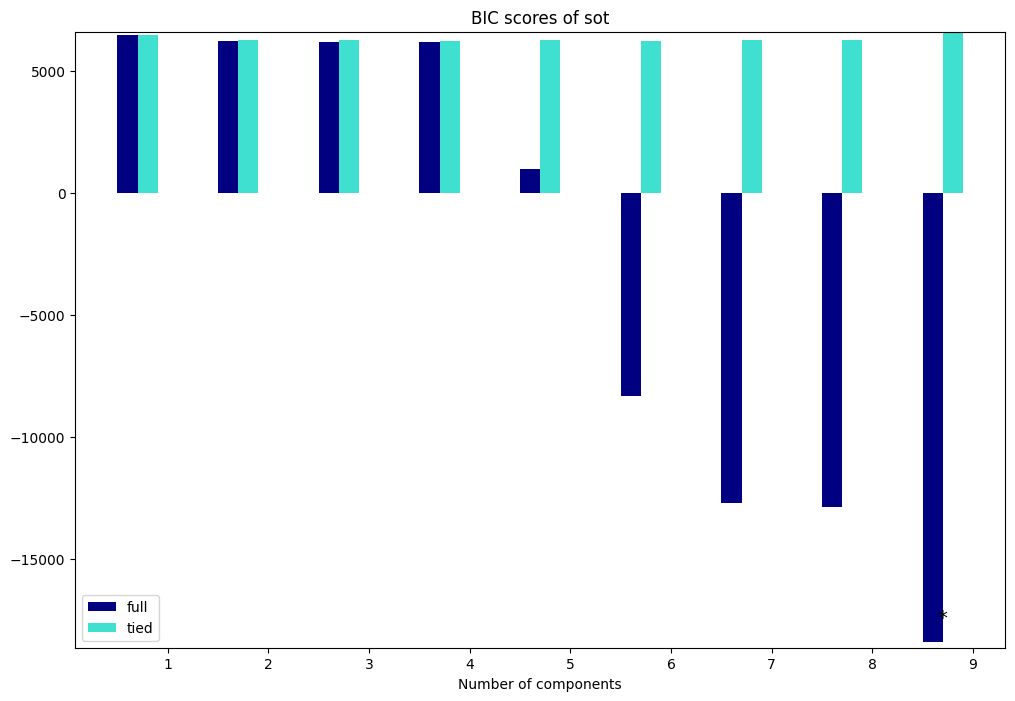

In [29]:
from sklearn.mixture import GaussianMixture
import itertools

# List of features to be transformed
features_to_transform = ['gf', 'ga', 'sot']
best_gmm_model=[]
# Iterate over each feature
for feature in features_to_transform:
    lowest_bic = np.inf
    bic = []
    n_components_range = range(1, 10)
    cv_types = ['full', 'tied']
    
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit Gaussian mixture theo phương pháp huấn luyện EM
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(matches[[feature]])
            bic.append(gmm.bic(matches[[feature]]))
            # Gán model có BIC scores thấp nhất là model tốt nhất
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
            
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise'])
    clf = best_gmm
    bars = []

    # Vẽ biểu đồ BIC scores
    plt.figure(figsize=(12, 8))
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title(f'BIC scores of {feature}')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    plt.xlabel('Number of components')
    plt.legend([b[0] for b in bars], cv_types)
    plt.show()


In [30]:
best_gmm_model

[]

In [31]:
matches["gf_gmm"]=best_gmm_model[0].predict(matches[["gf"]])
matches["ga_gmm"]=best_gmm_model[1].predict(matches[["ga"]])
matches["sot_gmm"]=best_gmm_model[2].predict(matches[["sot"]])
matches

IndexError: list index out of range

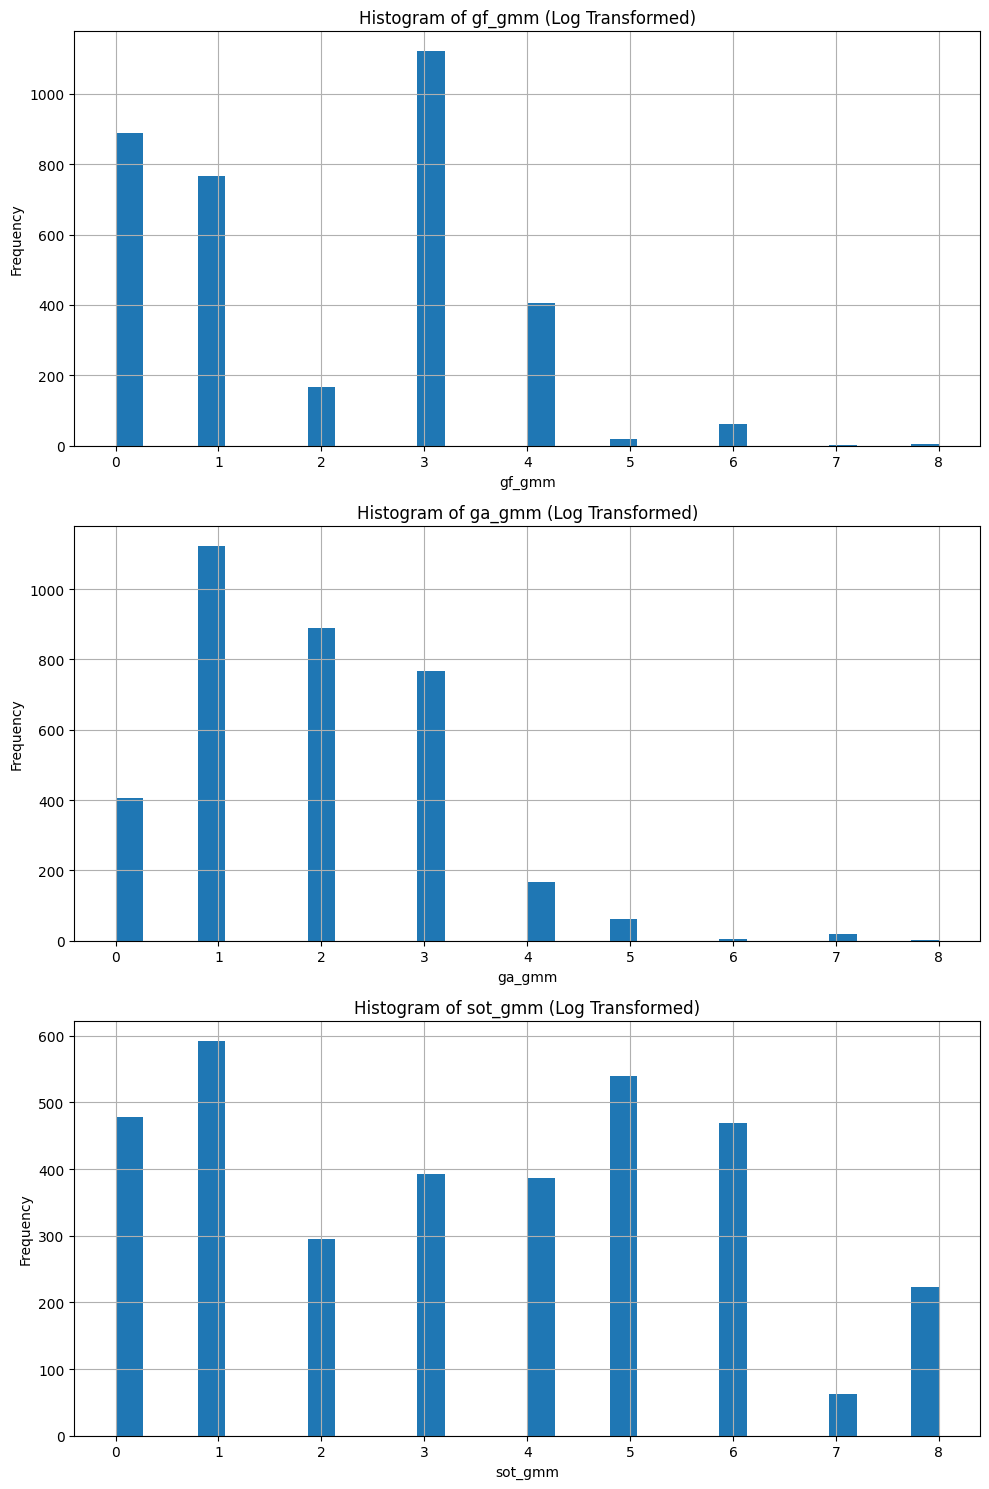

In [44]:
features_to_transform = ['gf_gmm', 'ga_gmm','sot_gmm']
# Plot histogram for the log-transformed features
fig, axes = plt.subplots(len(features_to_transform), 1, figsize=(10, 5 * len(features_to_transform)))

for i, feature in enumerate(features_to_transform):
    matches[feature].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {feature} (Log Transformed)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

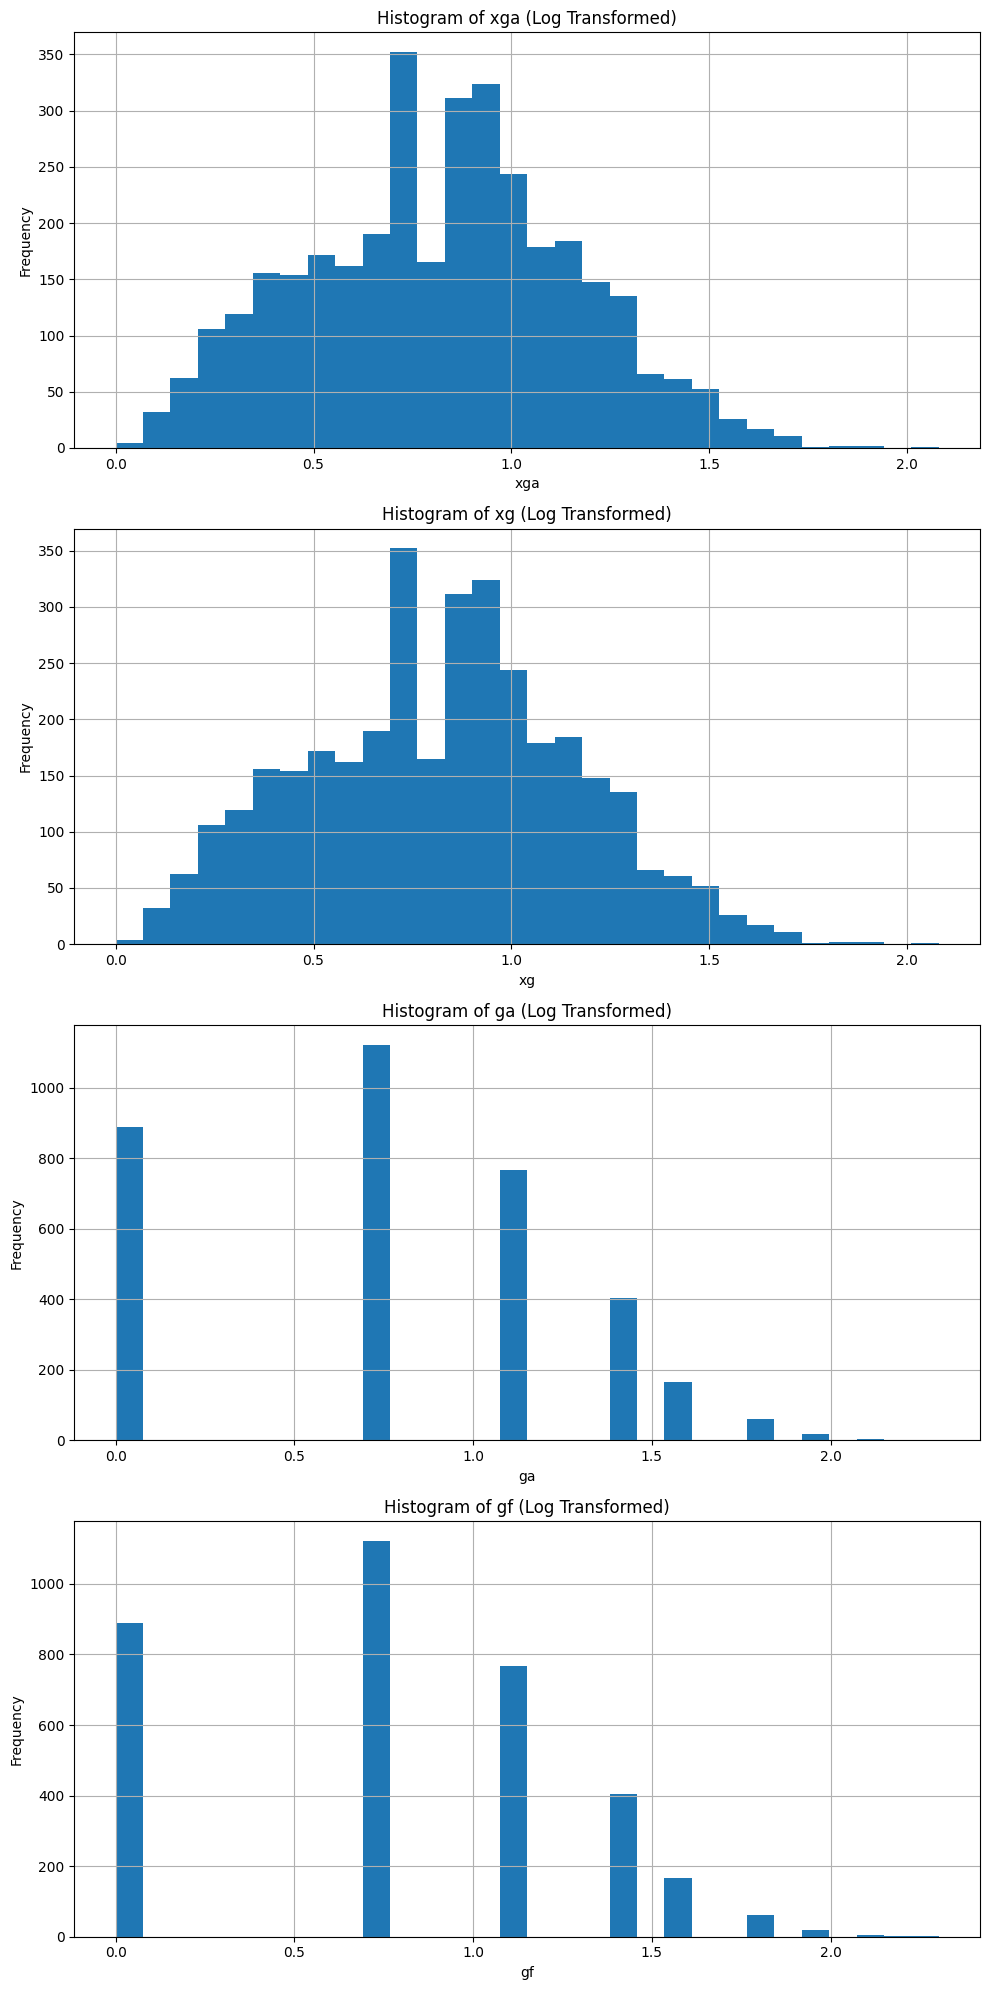

In [27]:
# Apply log transformation to the specified features
features_to_log_transform = ['xga', 'xg']

for feature in features_to_log_transform:
    matches[feature] = np.log1p(matches[feature])

# Plot histogram for the log-transformed features
fig, axes = plt.subplots(len(features_to_log_transform), 1, figsize=(10, 5 * len(features_to_log_transform)))

for i, feature in enumerate(features_to_log_transform):
    matches[feature].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {feature} (Log Transformed)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier(n_estimators=100, min_samples_split=10,random_state=1)

In [29]:
# Sort the dataset by date
matches_sorted = matches.sort_values(by='date')

# Determine the split index
split_index = int(len(matches_sorted) * 0.8)

# Split the dataset into train and test sets
train = matches_sorted.iloc[:split_index]
test = matches_sorted.iloc[split_index:]

# Display the shapes of the train and test sets
print(f'Train set shape: {train.shape}')
print(f'Test set shape: {test.shape}')

Train set shape: (2750, 42)
Test set shape: (688, 42)


In [30]:
#train thử với các cột sau
predictor=["venue_code", "day_code", "opp_code", "hour","captain_code","referee_code","formation_emb_3","formation_emb_2","formation_emb_0","formation_emb_1","opp_formation_emb_0","opp_formation_emb_1","opp_formation_emb_2","opp_formation_emb_3"]

In [31]:
rf.fit(train[predictor], train["target"])

RandomForestClassifier(min_samples_split=10, random_state=1)

In [32]:
preds=rf.predict(test[predictor])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy=accuracy_score(test["target"], preds)

In [35]:
accuracy

0.48691860465116277

In [36]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [37]:
#xem xét mô hình thường dự đoán đúng kết quả nào: thắng hay thua/hòa
pd.crosstab(index=combined["actual"], columns=combined["prediction"])
#kết quả cho thấy chúng ta dự đoán tốt hơn khi đội hòa/thua, kết quả dự đoán thắng rất thấp
#dựa vào matrix nên có thể thấy, mô hình chúng ta dự đoán đúng tỉ lệ thắng với thua là nhiều nhất, hòa là thấp nhất, có thể giải thích dễ hiểu vì dữ liệu các trận đấu hòa rất ít

prediction,0,1,2
actual,,,
0,4,98,78
1,4,177,73
2,8,92,154


In [38]:
# #sử dụng matrix khác
# from sklearn.metrics import precision_score
# precision_score(test["target"], preds)
#sử dụng ma trận precision score, cho ra kết quả khác, chúng ta chỉ dự đoán được 43% trận thắng

In [39]:
#cải thiện precision thông qua rolling average
groups_matches=matches.groupby("team")

In [40]:
group=groups_matches.get_group("Manchester United")

In [41]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation_emb_3,opp_formation_emb_3,captain_code,venue_code,hour,referee_code,team_code,opp_code,day_code,target
1,2024-08-16,20:00,Premier League,Matchweek 1,Fri,Home,W,0.000000,-0.621645,Fulham,...,0.654341,1.145555,24,1,20,24,12,8,4,2
2,2024-08-24,12:30,Premier League,Matchweek 2,Sat,Away,L,0.000000,0.378355,Brighton,...,0.654341,1.145555,24,0,12,4,12,30,5,1
3,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Home,L,-0.621645,0.653612,Liverpool,...,0.654341,1.145555,24,1,16,2,12,0,6,1
4,2024-09-14,12:30,Premier League,Matchweek 4,Sat,Away,W,0.653612,-0.621645,Southampton,...,0.654341,1.145555,24,0,12,29,12,19,5,2
6,2024-09-21,17:30,Premier League,Matchweek 5,Sat,Away,D,-0.621645,-0.621645,Crystal Palace,...,0.654341,-0.956224,24,0,17,7,12,14,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,2021-05-09,14:05,Premier League,Matchweek 35,Sun,Away,W,0.653612,0.000000,Aston Villa,...,0.654341,1.145555,63,0,14,3,12,7,6,2
56,2021-05-11,18:00,Premier League,Matchweek 36,Tue,Home,L,0.000000,0.378355,Leicester City,...,0.654341,0.438478,130,1,18,4,12,18,1,1
57,2021-05-13,20:15,Premier League,Matchweek 34,Thu,Home,L,0.378355,0.871099,Liverpool,...,0.654341,0.609141,24,1,20,2,12,0,3,1
58,2021-05-18,18:00,Premier League,Matchweek 37,Tue,Home,D,0.000000,0.000000,Fulham,...,0.654341,-0.956224,24,1,18,14,12,8,1,0


In [42]:
def rolling_average(group, cols, new_cols):
    group=group.sort_values("date")
    #nhìn xem trong 3 trận đấu gần đây nhất, đội thể hiện thế nào
    rolling_stats=group[cols].rolling(3,closed='left').mean()
    group[new_cols]=rolling_stats
    group=group.dropna(subset=new_cols)
    return group

In [43]:
cols=['ga', 'sot', 'gf','sh', 'dist','fk','pk','pkatt','poss','xga','xg']
new_cols=[f"{c}_rolling" for c in cols]

In [44]:
new_cols

['ga_rolling',
 'sot_rolling',
 'gf_rolling',
 'sh_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'poss_rolling',
 'xga_rolling',
 'xg_rolling']

In [45]:
rolling_average(group,cols,new_cols)

NameError: name 'rolling_average' is not defined

In [46]:
#áp dụng rolling average với mỗi đội
matches_rolling=matches.groupby("team").apply(lambda x: rolling_average(x,cols,new_cols))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21856\523395579.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling=matches.groupby("team").apply(lambda x: rolling_average(x,cols,new_cols))


In [47]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 17 2024-12-14  15:00  Premier League  Matchweek 16   
                        18 2024-12-22  14:00  Premier League  Matchweek 17   
                        19 2024-12-26  17:30  Premier League  Matchweek 18   
                        20 2024-12-29  15:00  Premier League  Matchweek 19   
                        21 2025-01-06  20:00  Premier League  Matchweek 20   

                            day venue result        gf        ga  \
team                                                               
Arsenal                 6   Sun  Home      W  0.414173 -0.352203   
                        7   Sat  Away      L -1.118579 -0.352203   
                        9   Sun  Home      L -1.118579 -0.352203   
                        11  Sun  Away      W -0.352203 -1.118579   
                        13  Sun  Home      L -1.118579  1.180549   
...                         ...   ...    ...       ...       ...   
Wolverhampton Wanderers 17  Sat  Home      L -0.352203  0.414173   
                        18  Sun  Away      W  1.180549 -1.118579   
                        19  Thu  Home      W  0.414173 -1.118579   
                        20  Sun  Away      D  0.414173  0.414173   
                        21  Mon  Home      L -1.118579  1.180549   

                                   opponent  ...  sot_rolling  gf_rolling  \
team                                         ...                            
Arsenal                 6     Sheffield Utd  ...    -0.252009    0.414173   
                        7   Manchester City  ...    -0.252009    0.158714   
                        9    Leicester City  ...    -0.252009   -0.352203   
                        11   Manchester Utd  ...    -0.117181   -0.607662   
                        13      Aston Villa  ...    -0.656495   -0.863121   
...                                     ...  ...          ...         ...   
Wolverhampton Wanderers 17     Ipswich Town  ...    -0.386838   -0.352203   
                        18   Leicester City  ...     0.017648   -0.607662   
                        19   Manchester Utd  ...     0.287305    0.158714   
                        20        Tottenham  ...     0.152476    0.414173   
                        21  Nott'ham Forest  ...    -0.252009    0.669632   

                            sh_rolling  dist_rolling fk_rolling pk_rolling  \
team                                                                         
Arsenal                 6    -0.848600     -0.021155   0.401997  -0.333914   
                        7    -1.265443     -0.019974  -0.649804  -0.333914   
                        9    -1.027247     -0.018041   0.401997  -0.333914   
                        11   -0.550855     -0.018041   0.927898  -0.333914   
                        13   -0.550855     -0.013585   0.927898   0.637318   
...                                ...           ...        ...        ...   
Wolverhampton Wanderers 17   -0.193560     -0.013316  -0.123903  -0.333914   
                        18    0.163734     -0.014122  -0.649804  -0.333914   
                        19    0.282832     -0.017397  -0.123903  -0.333914   
                        20   -0.431756     -0.014068   0.401997  -0.333914   
                        21   -0.729502     -0.013209   0.927898  -0.333914   

                           pkatt_rolling poss_rolling  xga_rolling  xg_rolling  
team                               

In [48]:
matches_rolling=matches_rolling.droplevel("team")

In [49]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot_rolling,gf_rolling,sh_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,poss_rolling,xga_rolling,xg_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,0.414173,-0.352203,Sheffield Utd,...,-0.252009,0.414173,-0.848600,-0.021155,0.401997,-0.333914,-0.370909,50.000000,1.600000,1.433333
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,-1.118579,-0.352203,Manchester City,...,-0.252009,0.158714,-1.265443,-0.019974,-0.649804,-0.333914,-0.370909,53.333333,1.633333,1.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,-1.118579,-0.352203,Leicester City,...,-0.252009,-0.352203,-1.027247,-0.018041,0.401997,-0.333914,-0.370909,46.666667,1.400000,0.933333
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,-0.352203,-1.118579,Manchester Utd,...,-0.117181,-0.607662,-0.550855,-0.018041,0.927898,-0.333914,-0.370909,54.000000,0.733333,0.733333
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,-1.118579,1.180549,Aston Villa,...,-0.656495,-0.863121,-0.550855,-0.013585,0.927898,0.637318,0.514637,48.000000,0.800000,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,2024-12-14,15:00,Premier League,Matchweek 16,Sat,Home,L,-0.352203,0.414173,Ipswich Town,...,-0.386838,-0.352203,-0.193560,-0.013316,-0.123903,-0.333914,-0.370909,54.000000,1.766667,0.900000
18,2024-12-22,14:00,Premier League,Matchweek 17,Sun,Away,W,1.180549,-1.118579,Leicester City,...,0.017648,-0.607662,0.163734,-0.014122,-0.649804,-0.333914,-0.370909,52.000000,1.033333,1.166667
19,2024-12-26,17:30,Premier League,Matchweek 18,Thu,Home,W,0.414173,-1.118579,Manchester Utd,...,0.287305,0.158714,0.282832,-0.017397,-0.123903,-0.333914,-0.370909,48.666667,0.966667,1.266667
20,2024-12-29,15:00,Premier League,Matchweek 19,Sun,Away,D,0.414173,0.414173,Tottenham,...,0.152476,0.414173,-0.431756,-0.014068,0.401997,-0.333914,-0.370909,50.333333,0.766667,1.100000


In [50]:
#xác định lại index
matches_rolling.index=range(matches_rolling.shape[0])

In [51]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot_rolling,gf_rolling,sh_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,poss_rolling,xga_rolling,xg_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,0.414173,-0.352203,Sheffield Utd,...,-0.252009,0.414173,-0.848600,-0.021155,0.401997,-0.333914,-0.370909,50.000000,1.600000,1.433333
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,-1.118579,-0.352203,Manchester City,...,-0.252009,0.158714,-1.265443,-0.019974,-0.649804,-0.333914,-0.370909,53.333333,1.633333,1.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,-1.118579,-0.352203,Leicester City,...,-0.252009,-0.352203,-1.027247,-0.018041,0.401997,-0.333914,-0.370909,46.666667,1.400000,0.933333
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,-0.352203,-1.118579,Manchester Utd,...,-0.117181,-0.607662,-0.550855,-0.018041,0.927898,-0.333914,-0.370909,54.000000,0.733333,0.733333
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,-1.118579,1.180549,Aston Villa,...,-0.656495,-0.863121,-0.550855,-0.013585,0.927898,0.637318,0.514637,48.000000,0.800000,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,2024-12-14,15:00,Premier League,Matchweek 16,Sat,Home,L,-0.352203,0.414173,Ipswich Town,...,-0.386838,-0.352203,-0.193560,-0.013316,-0.123903,-0.333914,-0.370909,54.000000,1.766667,0.900000
3353,2024-12-22,14:00,Premier League,Matchweek 17,Sun,Away,W,1.180549,-1.118579,Leicester City,...,0.017648,-0.607662,0.163734,-0.014122,-0.649804,-0.333914,-0.370909,52.000000,1.033333,1.166667
3354,2024-12-26,17:30,Premier League,Matchweek 18,Thu,Home,W,0.414173,-1.118579,Manchester Utd,...,0.287305,0.158714,0.282832,-0.017397,-0.123903,-0.333914,-0.370909,48.666667,0.966667,1.266667
3355,2024-12-29,15:00,Premier League,Matchweek 19,Sun,Away,D,0.414173,0.414173,Tottenham,...,0.152476,0.414173,-0.431756,-0.014068,0.401997,-0.333914,-0.370909,50.333333,0.766667,1.100000


In [52]:
def make_prediction(data,predictors):
    # Sort the dataset by date
    data_sort = data.sort_values(by='date')

    # Determine the split index
    split_index = int(len(data_sort) * 0.8)

    # Split the dataset into train and test sets
    train = data_sort.iloc[:split_index]
    test = data_sort.iloc[split_index:]
    rf.fit(train[predictors],train["target"])
    preds=rf.predict(test[predictors])
    print(preds)
    combined=pd.DataFrame(dict(actual=test["target"],predicted=preds),index=test.index)
    return combined


In [53]:
combined=make_prediction(matches_rolling,predictor+new_cols)

[2 1 1 1 2 2 1 0 2 1 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1 1 2
 2 2 1 2 1 2 1 2 1 1 1 2 1 2 2 1 2 1 2 1 1 2 1 2 1 2 1 2 1 2 2 2 2 2 2 2 2
 1 2 1 2 1 2 2 1 2 1 2 2 1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 1
 1 1 1 2 2 1 2 1 2 2 1 1 1 1 2 1 2 2 2 1 1 2 1 2 1 1 1 1 2 2 2 1 2 2 1 2 2
 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1
 1 1 2 2 1 2 2 1 1 2 2 2 1 2 1 2 1 2 1 1 1 1 2 2 2 2 1 2 2 1 2 2 1 2 2 1 1
 2 1 2 2 1 2 1 2 2 0 2 2 2 1 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1
 1 2 1 2 2 1 1 1 2 1 2 1 2 2 1 1 1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 2 2 2 2 1 2
 2 1 1 2 1 2 2 2 1 2 2 1 1 1 1 2 2 1 2 1 2 1 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2
 2 1 2 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 2 1 1 2 1 1 1 2 1 1 2 1 2 1 1 2 1 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 2 2 1 2 2 1 2 1 2 2 1 2 2 1 1 1 1 2 2
 1 2 2 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1
 2 2 2 2 0 2 2 2 1 1 2 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 2 1 2 1 2 2 2
 2 1 2 1 2 1 1 2 2 1 2 1 

In [54]:
predictor+new_cols

['venue_code',
 'day_code',
 'opp_code',
 'hour',
 'captain_code',
 'referee_code',
 'formation_emb_3',
 'formation_emb_2',
 'formation_emb_0',
 'formation_emb_1',
 'opp_formation_emb_0',
 'opp_formation_emb_1',
 'opp_formation_emb_2',
 'opp_formation_emb_3',
 'ga_rolling',
 'sot_rolling',
 'gf_rolling',
 'sh_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'poss_rolling',
 'xga_rolling',
 'xg_rolling']

In [55]:
combined

,actual,predicted
1873,2,2
527,1,1
3323,2,1
396,0,1
1445,1,2
...,...,...
1905,0,2
1478,0,2
2278,0,1
2575,2,1


In [56]:
combined=combined.merge(matches_rolling[["date","team","opponent","result"]],left_index=True,right_index=True)

In [57]:
combined

,actual,predicted,date,team,opponent,result
1873,2,2,2024-02-17,Liverpool,Brentford,W
527,1,1,2024-02-17,Brentford,Liverpool,L
3323,2,1,2024-02-17,Wolverhampton Wanderers,Tottenham,W
396,0,1,2024-02-17,Bournemouth,Newcastle Utd,D
1445,1,2,2024-02-17,Fulham,Aston Villa,L
...,...,...,...,...,...,...
1905,0,2,2025-01-05,Liverpool,Manchester Utd,D
1478,0,2,2025-01-05,Fulham,Ipswich Town,D
2278,0,1,2025-01-05,Manchester United,Liverpool,D
2575,2,1,2025-01-06,Nottingham Forest,Wolves,W


In [58]:
class MissingDict(dict):
    __missing__=lambda self,key: key
map_value={
    "Bright and Hove Albion": "Brighton",
    "Manchester United":"Manchester Utd",
    "Newcastle United":"Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United":"West Ham",
    "Wolverhampton Wanderers":"Wolves"

}
mapping=MissingDict(**map_value)

In [59]:
mapping["West Ham United"]

'West Ham'

In [60]:
combined["new_team"]=combined["team"].map(mapping)

In [61]:
combined

,actual,predicted,date,team,opponent,result,new_team
1873,2,2,2024-02-17,Liverpool,Brentford,W,Liverpool
527,1,1,2024-02-17,Brentford,Liverpool,L,Brentford
3323,2,1,2024-02-17,Wolverhampton Wanderers,Tottenham,W,Wolves
396,0,1,2024-02-17,Bournemouth,Newcastle Utd,D,Bournemouth
1445,1,2,2024-02-17,Fulham,Aston Villa,L,Fulham
...,...,...,...,...,...,...,...
1905,0,2,2025-01-05,Liverpool,Manchester Utd,D,Liverpool
1478,0,2,2025-01-05,Fulham,Ipswich Town,D,Fulham
2278,0,1,2025-01-05,Manchester United,Liverpool,D,Manchester Utd
2575,2,1,2025-01-06,Nottingham Forest,Wolves,W,Nottingham Forest


In [62]:
merged=combined.merge(combined,left_on=["date","new_team"],right_on=["date","opponent"])

In [63]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,2,2,2024-02-17,Liverpool,Brentford,W,Liverpool,1,1,Brentford,Liverpool,L,Brentford
1,1,1,2024-02-17,Brentford,Liverpool,L,Brentford,2,2,Liverpool,Brentford,W,Liverpool
2,0,1,2024-02-17,Bournemouth,Newcastle Utd,D,Bournemouth,0,2,Newcastle United,Bournemouth,D,Newcastle Utd
3,0,2,2024-02-17,Newcastle United,Bournemouth,D,Newcastle Utd,0,1,Bournemouth,Newcastle Utd,D,Bournemouth
4,1,1,2024-02-18,Luton Town,Manchester Utd,L,Luton Town,2,1,Manchester United,Luton Town,W,Manchester Utd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,1,2025-01-05,Ipswich Town,Fulham,D,Ipswich Town,0,2,Fulham,Ipswich Town,D,Fulham
581,0,2,2025-01-05,Liverpool,Manchester Utd,D,Liverpool,0,1,Manchester United,Liverpool,D,Manchester Utd
582,0,2,2025-01-05,Fulham,Ipswich Town,D,Fulham,0,1,Ipswich Town,Fulham,D,Ipswich Town
583,0,1,2025-01-05,Manchester United,Liverpool,D,Manchester Utd,0,2,Liverpool,Manchester Utd,D,Liverpool


In [64]:
#1: thua
#0: hòa
#2: thắng
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"]==2)]["actual_x"].value_counts()


actual_x
1    93
0    48
2    28
Name: count, dtype: int64

In [65]:
108/(108+39+35)

0.5934065934065934

In [66]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',
       'season', 'team', 'formation_emb_0', 'opp_formation_emb_0',
       'formation_emb_1', 'opp_formation_emb_1', 'formation_emb_2',
       'opp_formation_emb_2', 'formation_emb_3', 'opp_formation_emb_3',
       'captain_code', 'venue_code', 'opp_code', 'hour', 'referee_code',
       'day_code', 'target'],
      dtype='object')

In [67]:
from joblib import dump

# Save the model to a file
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']